## Final modeling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv('clean_train.csv')
test = pd.read_csv('clean_test.csv')

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression as LR
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, roc_curve
from sklearn.preprocessing import StandardScaler

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix

# Logistic Regression

In [6]:
X = train.drop(columns=['is_legendary'])
# Xother = X.copy()
# Xother = pd.get_dummies(Xother, columns=['abilities'])
Y = train['is_legendary']

xdata = train.drop(columns=['is_legendary'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
test_scaled = scaler.fit_transform(test)

In [7]:
XTRAIN,XTEST,YTRAIN,YTEST=train_test_split(xdata,Y)

In [8]:
r=LR(penalty='l1',random_state=1).fit(XTRAIN,YTRAIN)

In [9]:
b=r.coef_
a=r.intercept_
x0=-a/b
print("a (intercept)=",a)
print("b (slope)=",b)
print("x0 (50% point)=",x0)

a (intercept)= [-1.81447617]
b (slope)= [[-2.22527601e+00 -2.03311085e-02  4.22878509e-02  5.16117192e-03
   0.00000000e+00 -2.67110099e-01  2.61788307e-01  0.00000000e+00
   3.19938160e-01  0.00000000e+00  0.00000000e+00 -8.39765266e-02
   4.97055310e-01 -9.61128558e-01  0.00000000e+00  0.00000000e+00
   0.00000000e+00 -1.20905468e+00  0.00000000e+00  1.20447551e-01
  -2.74534721e-01  2.65076953e-02 -7.97247011e-03  1.83953333e-03
   1.06046548e-02  1.74232911e-02  3.53938416e-02]]
x0 (50% point)= [[-8.15393762e-01 -8.92462984e+01  4.29077415e+01  3.51562823e+02
              inf -6.79298979e+00  6.93108180e+00             inf
   5.67133403e+00             inf             inf -2.16069448e+01
   3.65045124e+00 -1.88786002e+00             inf             inf
              inf -1.50073954e+00             inf  1.50644506e+01
  -6.60927757e+00  6.84509217e+01 -2.27592722e+02  9.86378528e+02
   1.71101862e+02  1.04140840e+02  5.12653075e+01]]


In [10]:
YP=r.predict(XTEST)

##### Confusion Matrix

In [11]:
CM = confusion_matrix(YTEST,YP)

In [12]:
CM

array([[116,   2],
       [  5,   7]], dtype=int64)

#### Accuracy, Precision, and Recall

In [13]:
accuracy = accuracy_score(YP,YTEST)
TP,FP,FN = CM[0][0],CM[1][1],CM[1][0]
precision = TP/(TP+FP)
recall = TP/(TP+FN)

In [14]:
print("~",round(accuracy * 100, 1),"% accurate")
print("~",round(precision * 100, 1),"% precise")
print("~",round(recall * 100, 1),"% recall")

~ 94.6 % accurate
~ 94.3 % precise
~ 95.9 % recall


##### ROC

In [15]:
pX=r.predict_proba(XTEST)[:,1]

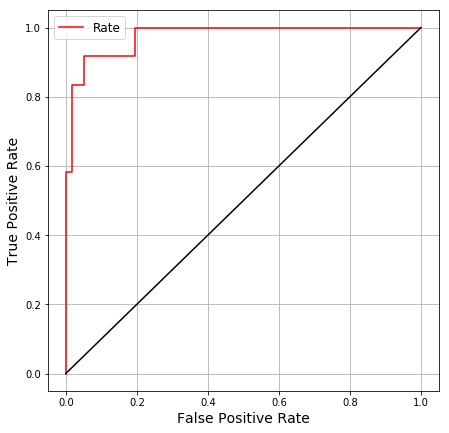

In [16]:
fpr2, tpr2, threshold2=roc_curve(YTEST,pX)
plt.plot(fpr2,tpr2,c="red",ls="-",label="Rate")
plt.plot([0,1],[0,1],c="k",ls="-")
plt.legend(fontsize=12)
plt.xlabel("False Positive Rate", fontsize=14)
plt.ylabel("True Positive Rate", fontsize=14)
plt.grid()
fig=plt.gcf()
fig.set_size_inches(7,7)
#fig.savefig("ROC-curve-gas-guzzler-logistic.pdf")